# Compute and compare different networks to "Hierarchical Framework for Leaf Instance Segmentation"

In [1]:
from argparse import Namespace
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from compute_scores import compute_scores

### Set the default value to run the script

- result_path: is the detected area from the networks
- gt_path: is the ground truth annotation area
- score: is the prediction probabilities default is 0.5
- write: is used to write results in a file

In [2]:
args_b_o    = Namespace(result_path    = "./coco_instances_results_BLEND_4.json",
                        gt_path        = "./validation900.json",
                        score          = 0.5,
                        write          = False)
sym_b_o, dice_b_o = compute_scores(args_b_o)

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 4045
Total element inside the images 3778

Starting computing Scores



Symmetric Dice: 100%|#############################################################| 3778/3778 [00:23<00:00, 161.46it/s]


In [3]:
args_s_o    = Namespace(result_path    = "./coco_instances_results_SOLO_2.json",
                        gt_path        = "./validation900.json",
                        score          = 0.5,
                        write          = False)
sym_s_o, dice_s_o = compute_scores(args_s_o)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 3626
Total element inside the images 3778

Starting computing Scores



Symmetric Dice: 100%|#############################################################| 3778/3778 [00:19<00:00, 191.50it/s]


In [4]:
args_b_c    = Namespace(result_path    = "./coco_instances_results_BLEND_3.json",
                        gt_path        = "./validation1350.json",
                        score          = 0.5,
                        write          = False)
sym_b_c, dice_b_c = compute_scores(args_b_c)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 5140
Total element inside the images 4228

Starting computing Scores



Symmetric Dice: 100%|#############################################################| 4228/4228 [00:25<00:00, 163.88it/s]


In [5]:
args_s_c    = Namespace(result_path    = "./coco_instances_results_SOLO_1.json",
                        gt_path        = "./validation1350.json",
                        score          = 0.5,
                        write          = False)
sym_s_c, dice_s_c = compute_scores(args_s_c)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 3872
Total element inside the images 4228

Starting computing Scores



Symmetric Dice: 100%|#############################################################| 4228/4228 [00:21<00:00, 193.69it/s]


Put the results to the percentage

In [6]:
sym_b_o     *= 100
dice_b_o    *= 100
sym_s_o     *= 100
dice_s_o    *= 100
sym_b_c     *= 100
dice_b_c    *= 100
sym_s_c     *= 100
dice_s_c    *= 100

### Set the result to a dataframe

### Computed results are Symmetric Best Dice and the Dice score 

In [7]:
data = pd.DataFrame(
    [   [sym_b_o, dice_b_o],
        [sym_s_o, dice_s_o],
        [sym_b_c, dice_b_c],
        [sym_s_c, dice_s_c],
        [74.7, 89.9]], 
    columns=["SBD", "Dice"], 
    index=["BlendMask non overlapped", "SOLO non overlapped", "BlendMask two categories", "SOLO two categories", "slice random walk"])

print(data)

                                SBD       Dice
BlendMask non overlapped  88.652733  87.728898
SOLO non overlapped       90.482341  92.960905
BlendMask two categories  87.042934  76.732865
SOLO two categories       90.869231  95.053775
slice random walk         74.700000  89.900000


<AxesSubplot:>

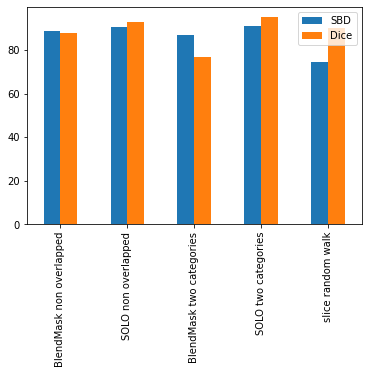

In [8]:
data.plot.bar()